# Lab 6 - Iris

Kalyn Howes & Chloe VanCory

COSC 311

12/10/21

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import random
import sklearn
import shap
import copy
import tqdm
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [2]:
def divideSets(p,data):
    copydata = copy.deepcopy(data)
    # print(copydata)
    np.random.shuffle(copydata)
    list1 = copydata[:int(p*len(copydata))]
    list2 = copydata[int(p*len(copydata)):]
    #print('List 1: \n', list1)
    #print('\nList 2: \n',list2)
    
    return (list1, list2)

# 1) Iris Data

In [3]:
iris = pd.read_csv('data/iris.data', header=None, 
                   names=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class'])
iris.head(200)

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


#### a) Train a model from the scikit-learn library on the data 
(e.g. support vector machine, tree classifier, multilayer perceptron). That is, your goal for the iris dataset is a multi-class decision of the iris species

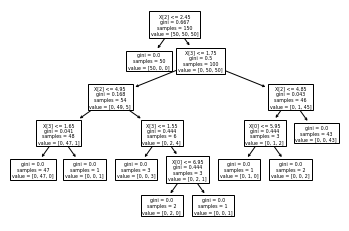

In [4]:
from sklearn import tree

x = iris[['sepal_length','sepal_width', 'petal_length', 'petal_width']].values
y = iris['class'].values

clf = tree.DecisionTreeClassifier()
clf = clf.fit(x, y)
_ = tree.plot_tree(clf)

In [5]:
# check accuracy with predictions & do a confusion matrix

# testing on already classified points
clf.predict([[5.1, 3.45, 1.4, 0.2], # setose
             [5.7, 2.9, 4.2, 1.3], # versicolor
             [6.7, 3.0, 5.2, 2.3]]) # virginica

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

100%|██████████| 90/90 [00:00<00:00, 6551.21it/s]


p = 0.6
Confusion Matrix: 
 [[28  0  0]
 [ 0 34  0]
 [ 0  0 28]]


<AxesSubplot:>

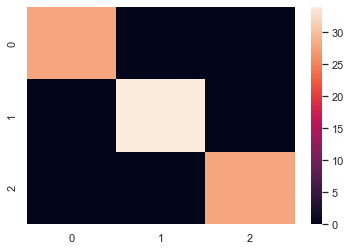

In [6]:
# need to create a matrix of lists in form: [[sepal_length, sepal_width, petal_length, petal_width]]
x = [ [iris['sepal_length'][i], iris['sepal_width'][i], iris['petal_length'][i], iris['petal_width'][i], 
       iris['class'][i]] for i in range(len(iris['sepal_length']))]

#print(x)

p = 0.6
n = len(x)
rets = divideSets(p, x)
list1 = rets[0] 
list2 = rets[1] 

# need to get the data in one array & the labels in another
data1 = [[[t[0], t[1], t[2], t[3]]] for t in list1]
labels1 = [t[4] for t in list1]
# print('\nData (List1):\n', data1)
# print('\nLabels (List1):\n', labels1)

data2 = [[[t[0], t[1], t[2], t[3]]] for t in list1]
labels2 = [t[4] for t in list1]
# print('\nData (List2):\n', data2)
# print('\nLabels (List2):\n', labels2)

predictions_labels = []
for i in tqdm.tqdm(range(len(data2))):
    predictions_labels.append(clf.predict(data2[i]))

# want predictions with their points
predictions = [ (data2[i], predictions_labels[i]) for i in range(len(predictions_labels))]
#print(predictions)
print(f'\np = {p:1.1}')
cf = confusion_matrix(labels2, predictions_labels)
np.set_printoptions(threshold=np.inf)
print('Confusion Matrix: \n', cf)

# heat map for confusion matrix
sns.set_theme()
sns.heatmap(cf)

#### (b) Using the shap package, plot the waterfall graph of SHAP values of the features in your data. 
Do this for a couple different predictions, how do they differ for different class outputs? Try for both a correct and incorrect prediction.

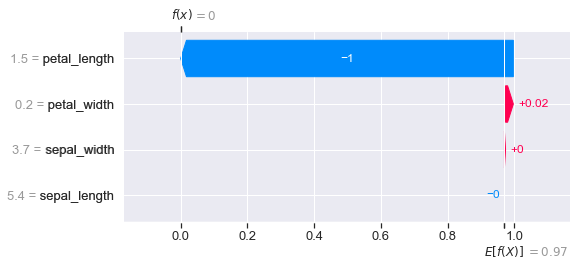

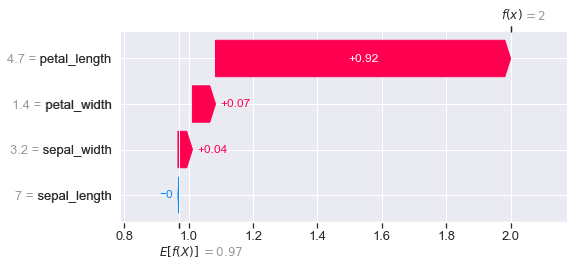

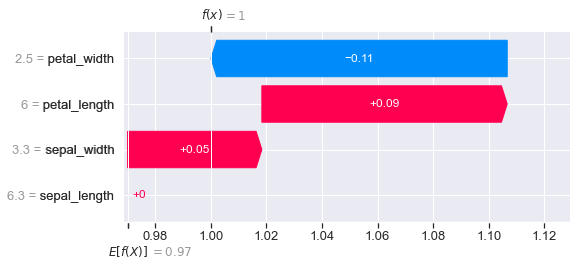

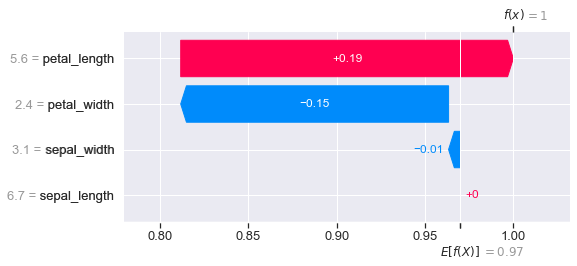

In [7]:
xs = iris[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].values
ys = iris['class']
ys = ys.replace(['Iris-setosa', 'Iris-virginica', 'Iris-versicolor'], [0,1, 2]).values

# probably a better idea to split the data etc.
clf.fit(xs,ys)

explainer = shap.Explainer(clf.predict, xs, feature_names=['sepal_length', 'sepal_width', 'petal_length', 'petal_width']) # pass in the predict method and the data to use
shap_values = explainer(xs)
#print(shap_values[0])

# check for different shap values: shap_values[1], [10] etc
shap.plots.waterfall(shap_values[10])
shap.plots.waterfall(shap_values[50])
shap.plots.waterfall(shap_values[100])
shap.plots.waterfall(shap_values[140])

The shap values only really differ by the petal length and width and not so much by the sepal measurements.

#### (c) Try the force plot on some individual SHAP values and also the entire set of predictions. 
What do these indicate about the influence of various features in your data?

In [8]:
# individual shap values:
shap.initjs()
shap.plots.force(shap_values[50])

In [9]:
shap.plots.force(shap_values)

These also indicate that the petal lengths and widths have the most impact on various features, rather than the sepal measurements.

#### (d) Try the above with a second model and compare and contrast the results.
(try a new machine learning model & do it again)

If you were to use one of these in a practical setting (i.e. your job/income/business depends on it), which would you choose and why?

In [10]:
from sklearn.neural_network import MLPClassifier
x = iris[['sepal_length','sepal_width', 'petal_length', 'petal_width']].values
y = iris['class'].values
clf2 = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)

clf2.fit(x, y)
clf2.predict([[5.1, 3.5, 1.4, 0.2]]) # should be setosa (first row in iris set)

array(['Iris-virginica'], dtype='<U15')

100%|██████████| 90/90 [00:00<00:00, 7212.77it/s]


p = 0.6
Confusion Matrix: 
 [[ 0  0 27]
 [ 0  0 36]
 [ 0  0 27]]


<AxesSubplot:>

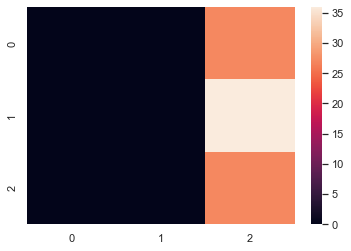

In [11]:
x = [ [iris['sepal_length'][i], iris['sepal_width'][i], iris['petal_length'][i], iris['petal_width'][i], 
       iris['class'][i]] for i in range(len(iris['sepal_length']))]

p = 0.6
n = len(x)
rets = divideSets(p, x)
list1 = rets[0] 
list2 = rets[1] 

# need to get the data in one array & the labels in another
data1 = [[[t[0], t[1], t[2], t[3]]] for t in list1]
labels1 = [t[4] for t in list1]
# print('\nData (List1):\n', data1)
# print('\nLabels (List1):\n', labels1)

data2 = [[[t[0], t[1], t[2], t[3]]] for t in list1]
labels2 = [t[4] for t in list1]
# print('\nData (List2):\n', data2)
# print('\nLabels (List2):\n', labels2)

predictions_labels = []
for i in tqdm.tqdm(range(len(data2))):
    predictions_labels.append(clf2.predict(data2[i]))

# want predictions with their points
predictions = [ (data2[i], predictions_labels[i]) for i in range(len(predictions_labels))]
#print(predictions)
print(f'\np = {p:1.1}')
cf2 = confusion_matrix(labels2, predictions_labels)
np.set_printoptions(threshold=np.inf)
print('Confusion Matrix: \n', cf2)

# heat map for confusion matrix
sns.set_theme()
sns.heatmap(cf2)

I would use the decision tree in a practical setting because it works way more accurately for this Iris set.

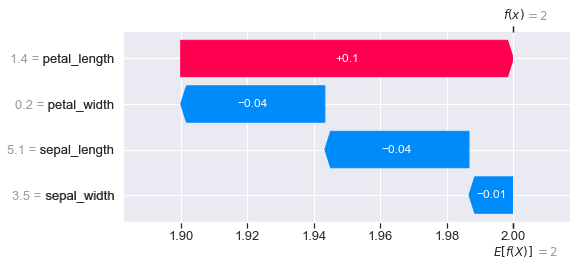

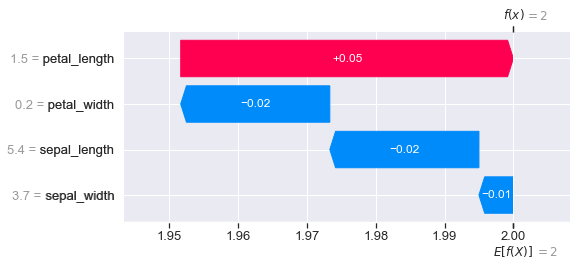

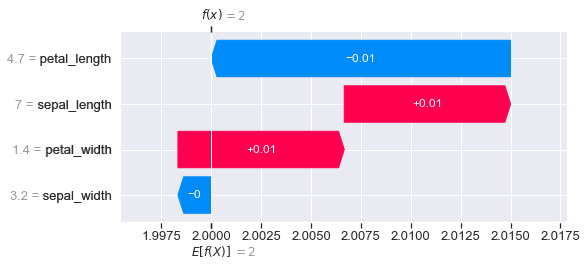

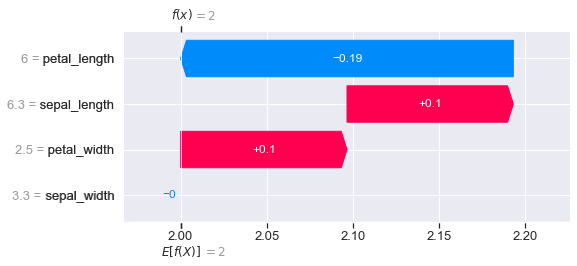

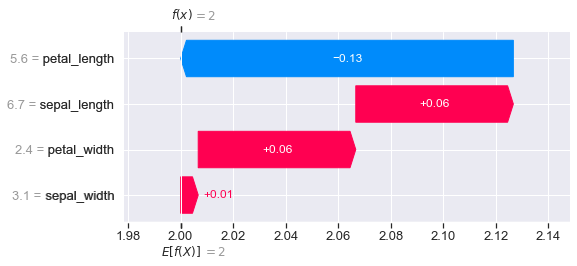

In [12]:
clf2.fit(xs,ys)

explainer = shap.Explainer(clf2.predict, xs, feature_names=['sepal_length', 'sepal_width', 'petal_length', 'petal_width']) # pass in the predict method and the data to use
shap_values2 = explainer(xs)
#print(shap_value2s[0])

# check for different shap values: shap_values[1], [10] etc
shap.plots.waterfall(shap_values2[0])
shap.plots.waterfall(shap_values2[10])
shap.plots.waterfall(shap_values2[50])
shap.plots.waterfall(shap_values2[100])
shap.plots.waterfall(shap_values2[140])

The lower indices in the shap values are opposite to those in the end of the shap array. 

In [13]:
shap.plots.force(shap_values2[50])

In [14]:
shap.plots.force(shap_values2)

These shap visuals are a lot more symmetric than the ones for the decision tree. Here the lengths of the petals and sepals seem to have more influence than the widths.